# p. 42-43

> Wrong definition of "Multivariate linear regression"

It seems that the definitions for “multiple / multivariable regression” and “multivariate regression” available online are highly mixed and often used interchangeably. Nevertheless, after some searching online, it seems that more respectable sources of the definitions of these terms agree on the following: 
-	**Multivariate regression**: predict multiple ($\ge 1$) dependable variables $y$ (labels);
-	**Multivariable / multiple regression**: uses multiple ($\ge 1$) input variables (independent variables / features) to predict one label $y$, e.g. $y = x1 + x2 + x3 + b$

Sources:
- "multivariate regression is a technique that estimates a single regression model with more than one outcome variable. When there is more than one predictor variable in a multivariate regression model, the model is a multivariate multiple regression." (https://stats.oarc.ucla.edu/stata/dae/multivariate-regression-analysis/)
- "Multivariable linear regression … with more variables … linear regression with two input variables and one output variable" (p . 191, “Essential Math for Data Science”, Thomas Nield (O’REILLY)) 
- "Statistically speaking, multivariate analysis refers to statistical models that have 2 or more dependent or outcome variables,1 and multivariable analysis refers to statistical models in which there are multiple independent or response variables." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518362/)
- "Multivariate Multiple Regression is a method of modeling multiple responses, or dependent variables, with a single set of predictor variables." (https://library.virginia.edu/data/articles/getting-started-with-multivariate-multiple-regression)



# Chapter 3

## p. 56 (erroneous epoch definition)

At the bottom of the page there is a definition of an *epoch*. In the ML and SGD literature online, there is a different definition for this term:
- **1 epoch**: going through the entire dataset once. In classical SGD with replacement, we cannot use the entire dataset due to replacement, so we better use term "iteration"


## p. 66 (Loss calculation mistake)

Check on Github - mistake in calculating RMSE - used prediction for the first data point vs entire label set, rather than all predictions vs all labels.

| | |
| - | - |
| Version 'a':<br>Book version (erroneous)<br> `predictions = features[0] * _m + _b` | 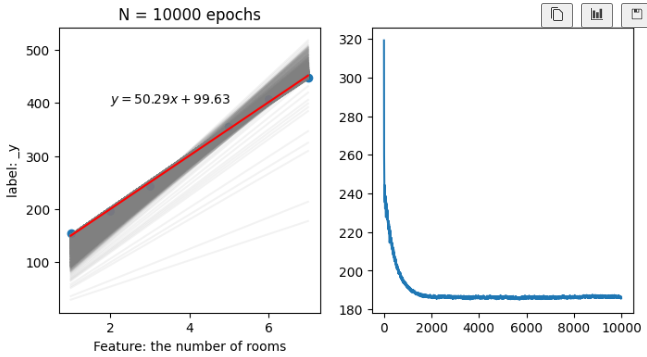 | |
| Version 'b':<br>My version (corrected)<br> `predictions = [ i*_m1 + j*_m2 + _b for i,j in features ]` | 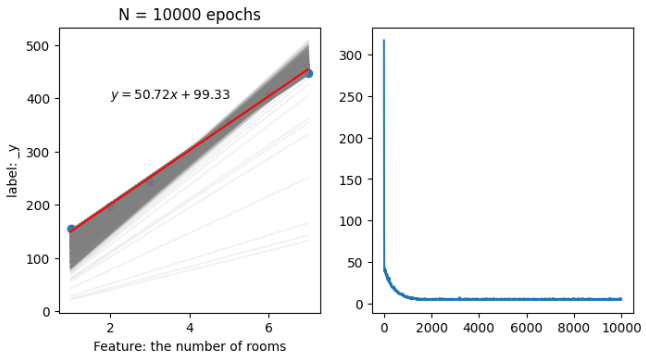 |

Code:

```py
def linear_regression(features_data, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for epoch in range(epochs):
		### Here there was a mistake:
		### The book (version 'a') just used prediction for the first data point in the 'features' array,
		### therefore, rmse was calculated as rmse for each point in the labels minus the same prediction for the first data point.
		### this is incorrect, as we should compare predictions for all data points in features vs all labels
		### so version 'b' is correct
		# predictions = features_data[0] * _m + _b # Version 'a' (manning book)
		predictions = [ i*m + b for i in features_data ] # version 'b' (my version)
		# print(predictions)
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors
```


## Implementing SGD for simple linear regression (p.55)

> This example was slightly modified from the excellent book "Grokking Machine Learning" by the brilliant Luis Serrano.

Below is a book's intuition for Stochastic Gradient Descent for simple linear regression, given as "square trick" and "absolute trick". 

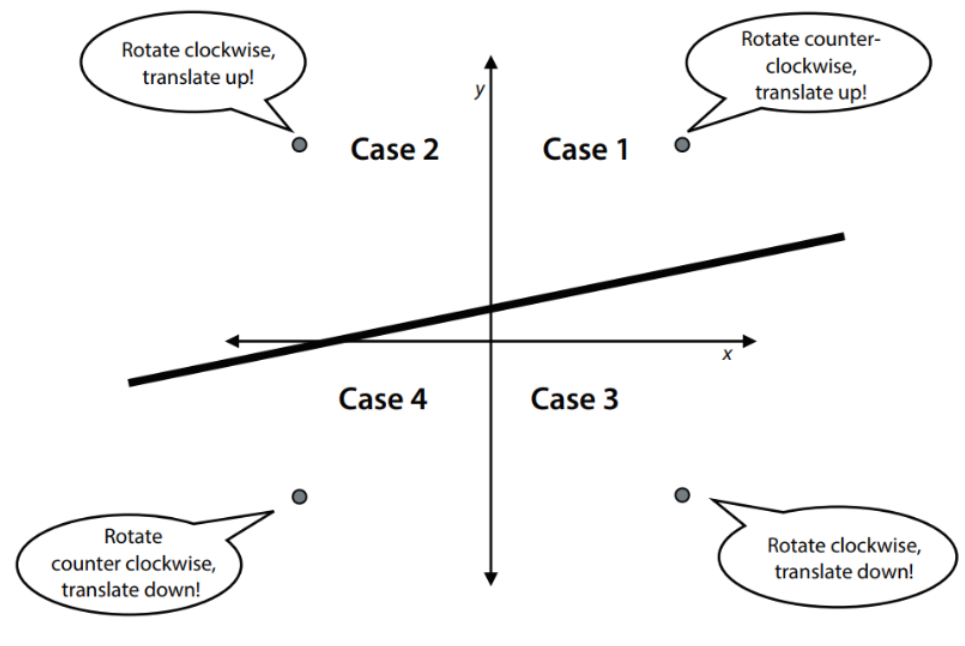

In the "square trick", we want to move the line up if the real point is above the prediction line and move it downward when the point is below the prediction line. 

- **Adjusting the y-intercept $b$**:
  - We want to add some number to the y-intercept $b$ when point is above the prediction line, and subtract if point is below; 
  - therefore, we can just add $ \eta (p-\hat{p})$ to y-intercept. 
- **Adjusting the slope $m$**:
  - We can adjust the slope by adding to slope the product of $x$ and $(y - \hat{y})$
  - A detailed explanation below:
  - We need to reduce $m$ in cases 2 and 3:
    - Case 2: $x < 0, (y - \hat{y}) > 0, x * (y - \hat{y}) < 0$
    - Case 3: $x > 0, (y - \hat{y}) < 0, x * (y - \hat{y}) < 0$
  - We need to increase $m$ in cases 1 and 4:
    - Case 1: $x > 0, (y-\hat{y}) > 0, x * (y-\hat{y}) > 0$ 
    - Case 4: $x < 0, (y-\hat{y}) < 0, x * (y-\hat{y}) > 0$

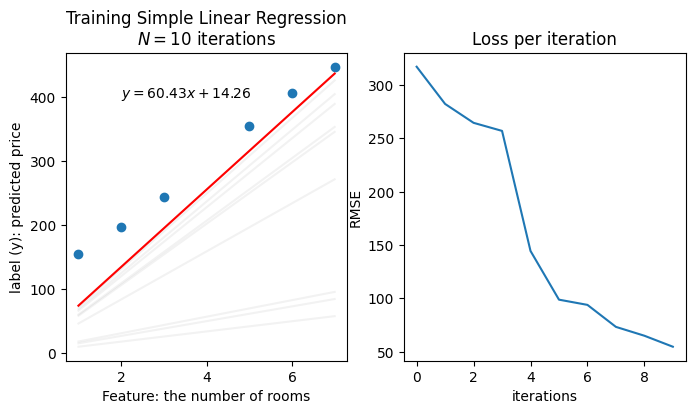

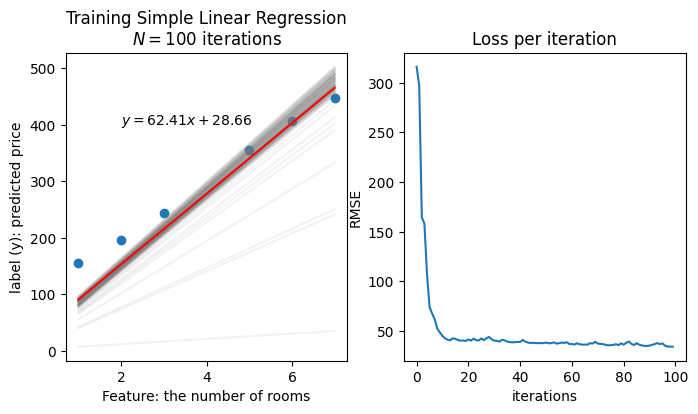

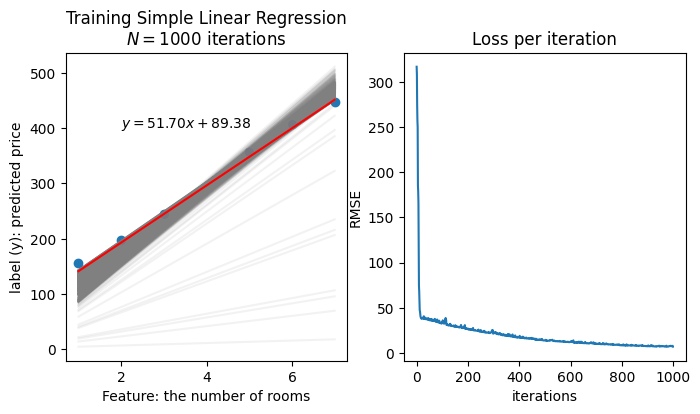

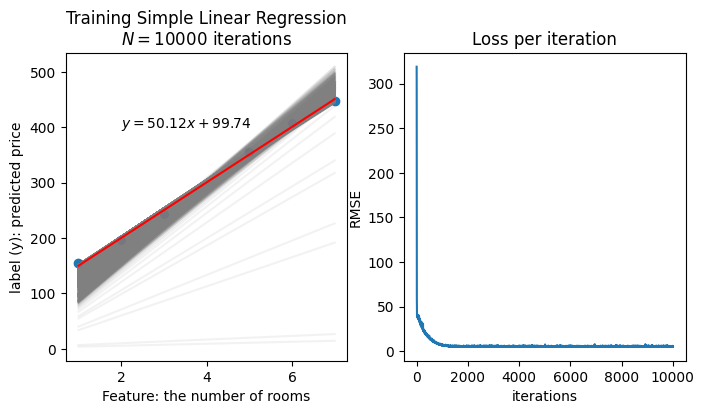

In [1]:
"""
Simple Linear Regression 
parameter training with Stochastic Gradient Descent
"""
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, 
         predictions
         ):
	"""
	return Root Mean Square Error of predictions
    """
	### y - y_hat
	differences = np.subtract(labels, predictions)
	n = len(labels)
	### here we use np.dot dot product of differences, which is essentially the sum of squares of each difference; a sum of products of corresponding terms in two vectors
	return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(b, 
                 m, 
                 x, 
                 y, 
                 learning_rate
                 ):
	"""
	"Grokking Machine Learning", p. 55
	This function updates parameters b and m based on one data point _x and label _y.
	It basically represents a derivative of the cost function e(x) of square difference:
	e(x) = sum( y_hat - y )^2 = sum( mx+b - y )^2
	with respect to m and b separately
	"""
	### Calculate prediction
	y_pred = b + m*x
	### Change y-intercept $b$
	b += learning_rate * (y - y_pred)
	### Change slope $m$
	m += learning_rate * x * (y - y_pred)
	return m, b

def absolute_trick(b, 
                   m, 
                   x, 
                   y, 
                   learning_rate
                   ):
	"""
	you can also use this way of updating parameters m and b

	simpler than the square trick because it only uses _x to adjust the parameters
	
	is based on another loss metric
	"""
	y_pred = b + m*x 
	### if the point is above the line
	if y > y_pred:
		### increase slope m
		m += learning_rate * x 
		### translate the intercept up
		b += learning_rate
	else:
		m -= learning_rate * x 
		b -= learning_rate 
	return m, b 

def linear_regression(features_data, 
                      labels, 
                      learning_rate=0.01, 
                      iterations=1000
                      ):
	""" 
	algorithm for linear regression learning
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for iteration in range(iterations):
		### Here there was a mistake in the book's code in calculating predictions for error estimation: see subsection "p. 66 (Loss calculation mistake)"
		predictions = [ i*m + b for i in features_data ]
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors

features_data = np.array([1,2,3,5,6,7])
labels = np.array([155,197,244,356,407,448])

### For different number of iterations
for i in [10, 100, 1000, 10000]: 
	fig, axes = plt.subplots(1, 2, figsize=(8,4))
	### [0] Left plot
	### plot data points
	axes[0].scatter(features_data, labels)
	axes[0].set_xlabel('Feature: the number of rooms')
	axes[0].set_ylabel('label (y): predicted price')
	axes[0].set_title(f"Training Simple Linear Regression\n$N = {i}$ iterations") 
	### Plot lines of intermediate trained linreg models
	slope_intercept_list_ready, errors = linear_regression(features_data, 
                                                           labels, 
                                                           learning_rate=0.01, 
                                                           iterations=i)
	for i in slope_intercept_list_ready:
		current_slope, current_intercept = i[0], i[1]
		axes[0].plot( features_data, features_data*current_slope + current_intercept, color='grey', alpha=0.1 )
	### Plot final trained linreg line (red)
	final_slope, final_intercept = slope_intercept_list_ready[-1][0], slope_intercept_list_ready[-1][1]
	axes[0].plot( features_data, features_data*final_slope + final_intercept, color='red' )
	axes[0].text(2, 400, rf'$y={final_slope:.2f}x + {final_intercept:.2f}$')
	### [1] Right plot
	axes[1].plot( range(len(errors)), errors )
	axes[1].set_xlabel('iterations')
	axes[1].set_ylabel('RMSE')
	axes[1].set_title( 'Loss per iteration')


## Implementing SGD for multiple linear regression

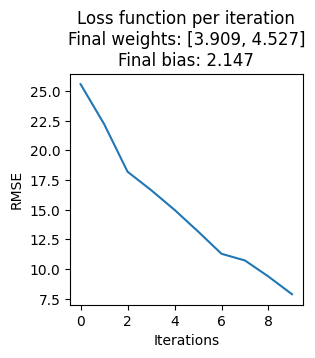

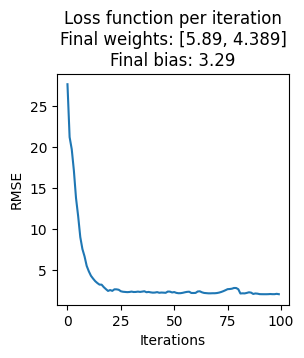

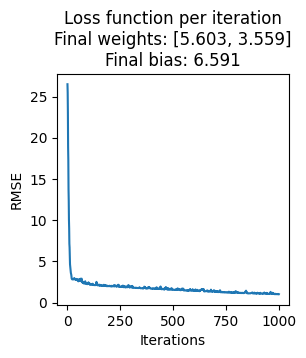

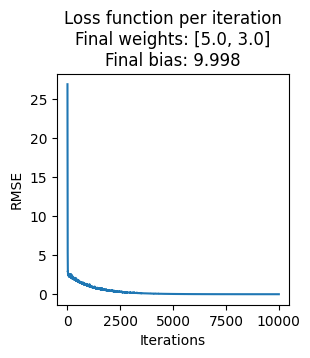

In [20]:
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, 
         predictions
         ):
    n = len(labels)
    ### y - y_hat
    differences = np.subtract(np.array(labels), predictions)
    ### here we use np.dot dot product of differences, which is essentially sum of squares of each difference
    return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(b, 
                 m, 
                 x, 
                 y, 
                 learning_rate
                 ):
    ### Calculate prediction
    y_pred = np.dot(m, x) + b
    ### Change y-intercept $b$
    b += learning_rate * (y - y_pred)
    ### Change slope $m$
    #### You can adjust m parameters one by one
    # m1 += learning_rate * x1 * (y - y_pred)
    # m2 += learning_rate * x2 * (y - y_pred)
    #### A better alternative is to adjust all the parameters at the same time using the vector structure
    delta = x * (y - y_pred) * learning_rate
    m = m + delta
    return m, b

def linear_regression(features, 
                      labels, 
                      learning_rate=0.01, 
                      iterations=1000
                      ):
    # Generate random values for the slope and y-intercept
    # m1, m2 = random.random(), random.random() 
    m = np.array([random.random() for i in range(len(features[0]))])
    b = random.random()
    # Repeats the update step many times
    slope_intercept_list, errors = [], []
    for epoch in range(iterations):
        predictions = np.dot(features, m) + b
        errors.append(rmse(labels, predictions))
        ### Pick a random point in out dataset
        i = random.randint(0, len(features)-1) 
        x = features[i]
        y = labels[i]
        # Apply the square trick to move the line closer to our point
        m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
        slope_intercept_list.append([m, b])
    return slope_intercept_list, errors

"""
equation: 
y = 5x_1 + 3x_2 + 10
"""
features = np.array([[i,j] for i in range(1,5) for j in range(1,5)])
labels = np.array([5*i + 3*j + 10 for i,j in features])

def plot_visualisations(features, labels):
    # Plot the visualisations
    figure_size, epoch_alpha = (4,4), 0.1
    # for i in [10, 100, 1000]: # Different number of iterations
    for i in [10, 100, 1000, 10000]:
        slope_intercept_list_ready, errors = linear_regression(features, labels, learning_rate=0.01, iterations=i)
        ### Plot final line
        plt.figure(figsize=(3,3))
        plt.plot( range(len(errors)), errors )
        plt.ylabel('RMSE')
        plt.xlabel('Iterations')
        plt.title(f'Loss function per iteration\nFinal weights: {[round(i, 3) for i in slope_intercept_list_ready[-1][0]]}\nFinal bias: {round(slope_intercept_list_ready[-1][1], 3)}')
        plt.show()

plot_visualisations(features, labels)

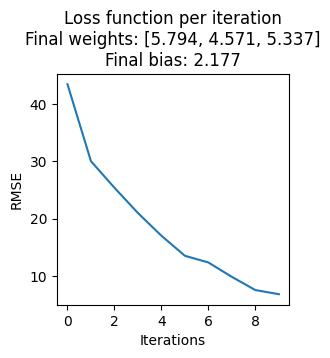

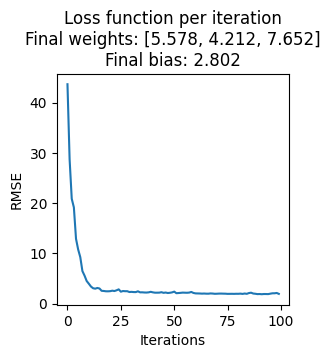

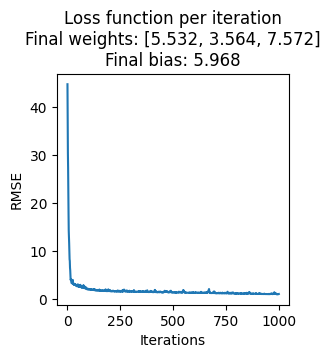

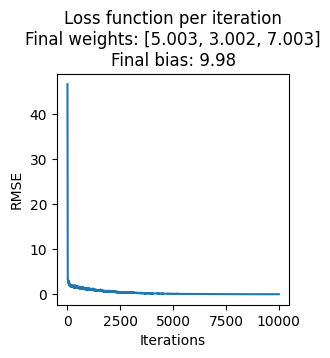

In [22]:
"""
equation: 
y = 5x_1 + 3x_2 + 7x_3 + 10
"""
features = np.array( [[i,j,k] for i in range(1,5) for j in range(1,5) for k in range(1,5)] )
labels = np.array( [5*i + 3*j + 7*k + 10 for i,j,k in features] )

plot_visualisations(features, labels)


# Chapter 5

## p. 113

Lower half of the page:

> "The equation of the score of the classifier, and also of the line in figure 5.5, follows: #crack + #doink - 3.5 = 0"

The presented equation is, as the text states, equation of the classifier threshold / class separation line; however, it is NOT the equation for the score! The equation for the score of the classifier has to have $\hat{y}$ and corresponds to the following equation
$$\hat{y} = \text{\#crack} + \text{\#doink} - 3.5$$

## p. 119

Lower part of the page:

> "Words with positive weights are happy, and words with <u>negative words</u> are sad."

Instead of the underlined "negative words", it should have said "negative weights". 

## p. 120
Upper part of the page, figure 5.11. The line on the left has a <u>positive</u> bias, while the one on the right has a <u>negative</u> bias. 

The confusion stems from the following misambiguation. 

Consider the following plots: 

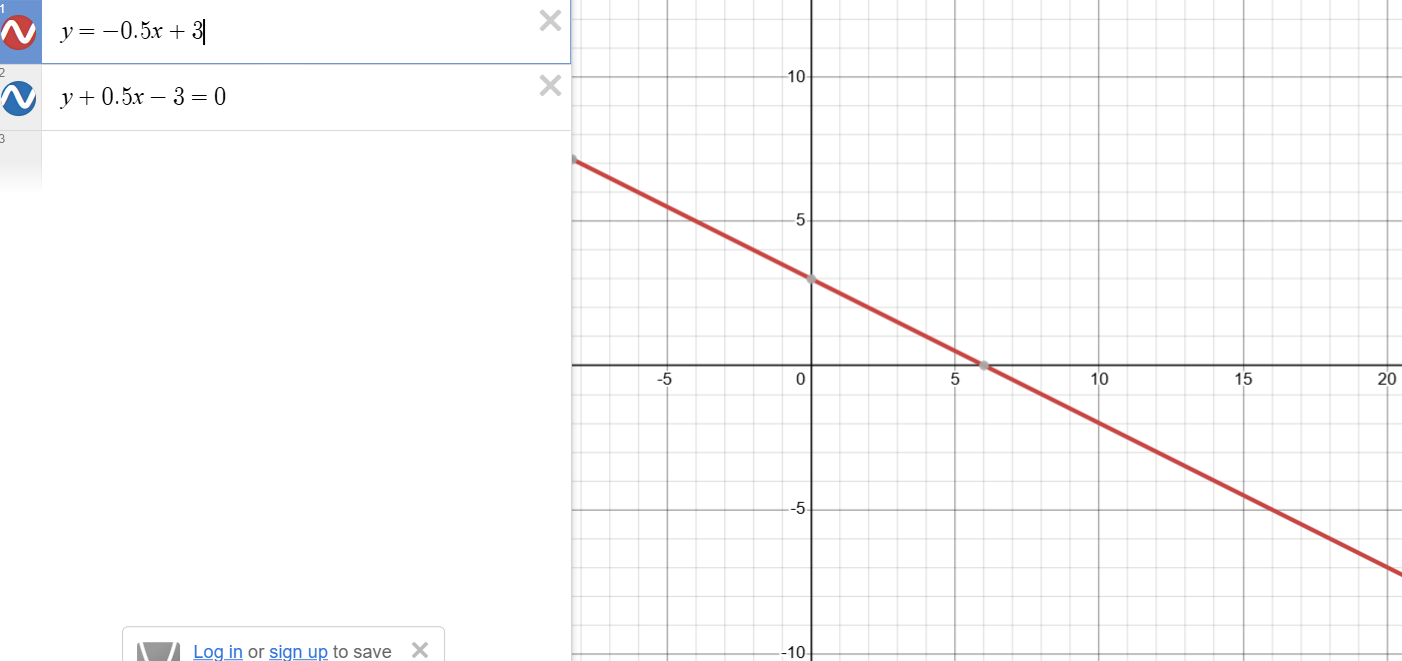

If you consider equation in this form $y+0.5x-3=0$, then the bias is negative. However, this equation coresponds simply to the line dividing the two classes, not making a prediction. However, if you consider the same equation but rewritten to make a prediction - $y=-0.5x+3$, then the bias is actually positive. 

## p. 133

in the Procedure, in Case 3, it says "$b` = b - \mu x_{2}$". However, the bias should increase, so the correct equation should say "$b` = b + \mu x_{2}$"

p. 139

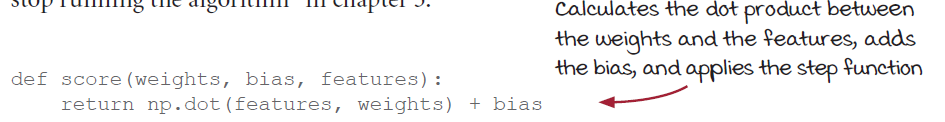

The score doesn't apply the step function at this step; it applies step function to the result of the "score" function. 

## Coding the perceptron

##### 1 (by hand)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df.head()

,feature 1,feature 2,label
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


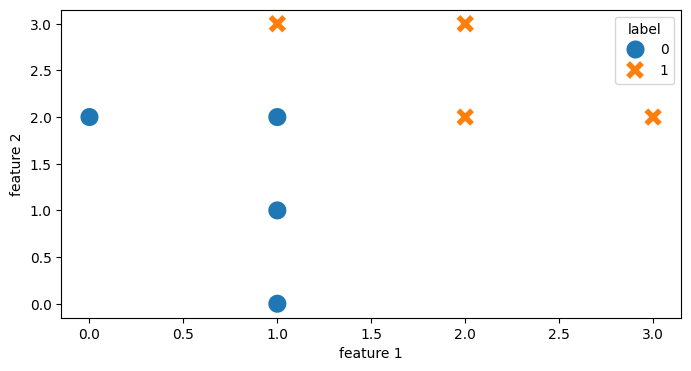

In [ ]:
plt.figure(figsize=(8,4));
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=200, 
	hue=df['label']
	# markers={'feature 1':'s', 'feature 2': 'X'}
);

In [ ]:
# Coding the perceptron trick

def score(weights, bias, features):
    """
    this is a continuous prediction before applying the step function
    """
    return np.dot(features, weights) + bias 

def step(x):
    """
    applies the step function to the score x
    """
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    """
    calculates error for prediction for one data point
    """
    pred = prediction(weights, bias, features)
    ### If the prediction is equal to the label,
    ### then the point is well classified,
    ### which means the error is zero
    if pred == label:
        return 0
    ### If the prediction is different from the label, then the point is misclassified,
    ### which means that the error is equal to the absolute value of the score
    else:
        return np.abs( score(weights, bias, features) )

def mean_perceptron_error(weights, bias, features, labels):
    """
    calculates the mean of errors of all data points in the dataset
    """
    total_error = 0
    ### Loops through our data, and for each point, adds the error at that point, then returns this error
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    ### Get mean error
    return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        ### updates the weights and biases using the perceptron trick
        weights[i] += (label-pred) * features[i] * learning_rate
    bias += (label-pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, 
                         labels, 
                         learning_rate=0.01, 
                         epochs=200,
                         visualise=True
                         ):
    """
    Starts with randomly-initialised perceptron classifier 
    and repeats the perceptron trick for many iterations
    """
    ### Initialises the weights to 1 and the bias to 0 (essentially, random numbers)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    cumulative_weights_bias = []
    ### Repeat for N number of epochs
    for epoch in range(epochs):
        ### Calculate mean perceptron error
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        ### Pick a random point in the dataset
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
        cumulative_weights_bias.append([ weights, bias ])
        # Draw a graph
        datapoints = np.arange(0, 4, 1)
        a = weights[0]
        b = weights[1]
        c = bias
        if visualise:
            sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , alpha=0.05, color='grey'  )
    return weights, bias, cumulative_weights_bias, errors



0.4199999999999995
0.10999999999999936
-0.6900000000000004


Text(0.5, 1.0, 'Classifier\nRed line (decision border) equation: 0=0.42x1 + 0.11x2 + -0.69\nPrediction: y = 0.42x1 + 0.11x2 + -0.69')

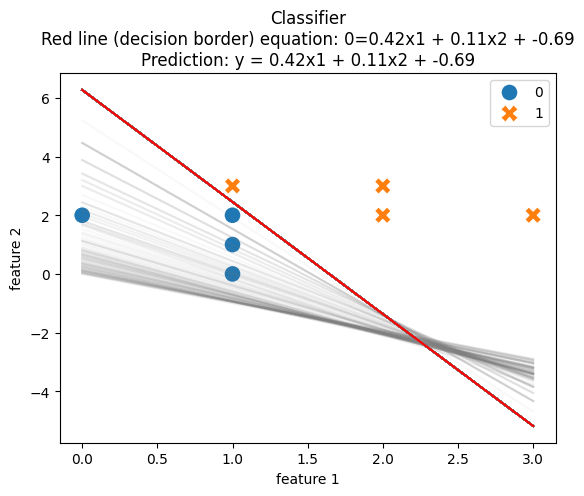

In [ ]:
# Plot
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=150, 
	hue=df['label'], 
	# markers={'feature 1':'s', 'feature 2': 'X'}
)

output = perceptron_algorithm(features, labels, epochs=300)
a = output[0][0]; print(a) # "a" is the weight for x-axis feature
b = output[0][1]; print(b) # "b" is the weight for y-axis feature
c = output[1]; print(c)

datapoints = np.arange(0, 4, 1)
sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , color='red'  )
# plt.text(rf'$0={a:.2f}x_1 + {b:.2f}x_2 + {c:.2f}$');
plt.title(f'Classifier\nRed line (decision border) equation: 0={a:.2f}x1 + {b:.2f}x2 + {c:.2f}\nPrediction: y = {a:.2f}x1 + {b:.2f}x2 + {c:.2f}')

Text(0.5, 0, 'Iteration')

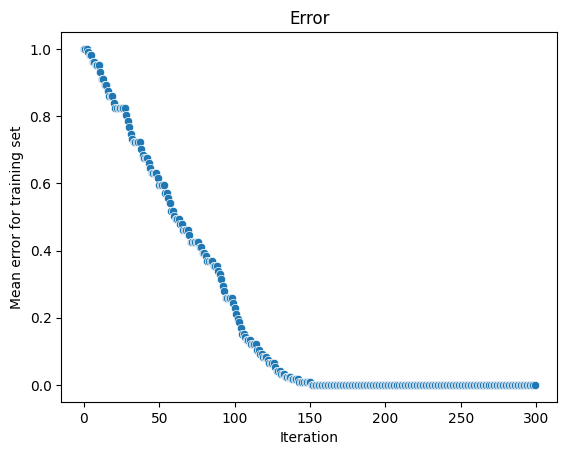

In [ ]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

##### 1.1

same but for more features and all of them are binary.

In [ ]:
import numpy as np

features = np.array([ [0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,0],[0,0,0,1] ])
labels = np.array([1,1,1,1,0,0,0,0])

# df = pd.DataFrame({
# 	'feature 1': features[:,0], 
# 	'feature 2': features[:,1],
# 	'label': labels
# })

# df.head()

output = perceptron_algorithm(features, labels, epochs=1000, visualise=False)

In [ ]:
output[0], output[1]

([0.5499999999999996,
  0.4599999999999995,
  0.5899999999999996,
  0.46999999999999953],
 -1.0700000000000007)

Text(0.5, 0, 'Iteration')

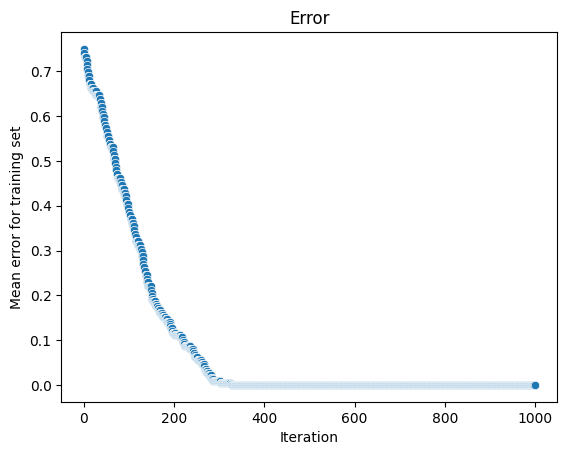

In [ ]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

In [ ]:
output[0]

[0.5499999999999996,
 0.4599999999999995,
 0.5899999999999996,
 0.46999999999999953]

In [ ]:
### Predict the labels for the training set
predictions = list()
for i in features:
    prediction = np.dot(output[0], i) + output[1]
    if prediction > 0:
        predictions.append(1)
    else:
        predictions.append(0)
predictions

[1, 1, 1, 1, 0, 0, 0, 0]